# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv', sep=',')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
df.loc[df['APGAR5'] <= 3, 'CAT_APGAR5'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),'CAT_APGAR5'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7),'CAT_APGAR5'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8), 'CAT_APGAR5'] = 'normal'

df.loc[:,['CAT_APGAR5']]


,CAT_APGAR5
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
27023,normal
27024,normal
27025,normal
27026,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Há nascimentos com valores nulos na coluna APGAR5 e portanto também na nova coluna CAT_APGAR5. Para a montagem dos gráfico será utilizado somente as linhas com valores para CAT_APGAR5 não nulos.

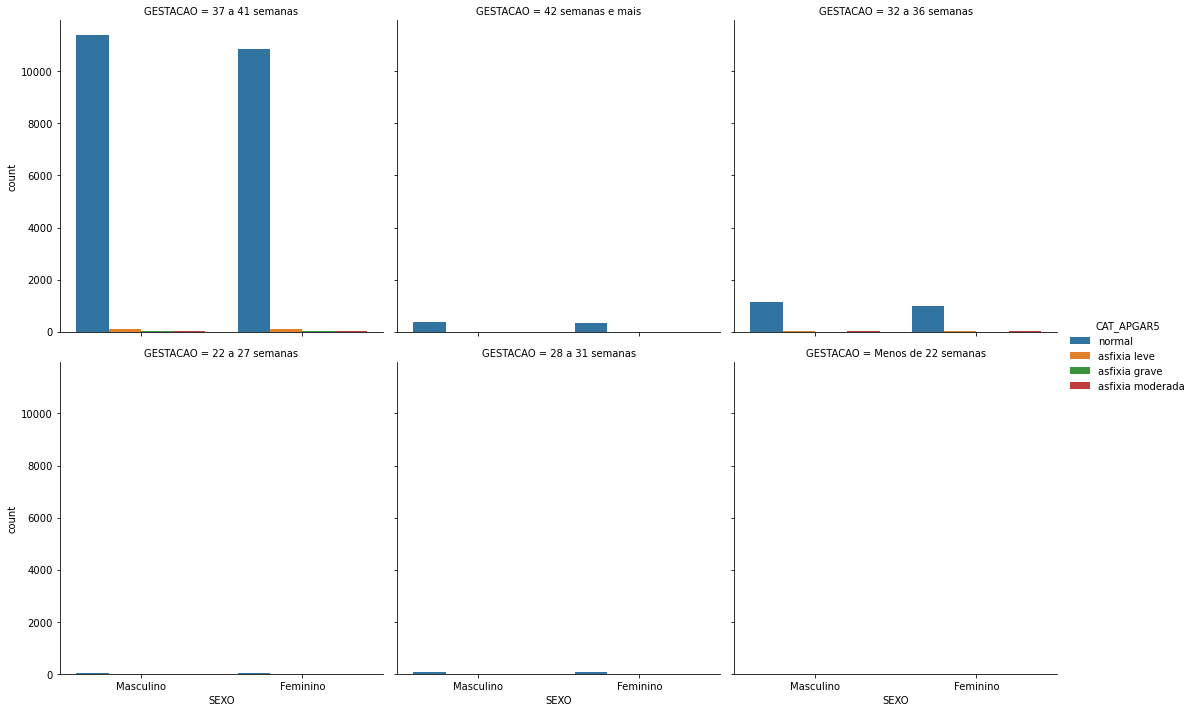

In [5]:
sns.catplot(x='SEXO'
              , hue = 'CAT_APGAR5'
              , col='GESTACAO'
              , col_wrap = 3
              , data=df.loc[~df.CAT_APGAR5.isnull()]
              , kind = 'count'
             
             )


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
freq = pd.crosstab(df.loc[~df.CAT_APGAR5.isnull()]['GESTACAO'],df.loc[~df.CAT_APGAR5.isnull()]['CAT_APGAR5'])
freq

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
freq_pct = freq.div(freq.sum(axis = 1), axis = 0)
freq_pct

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

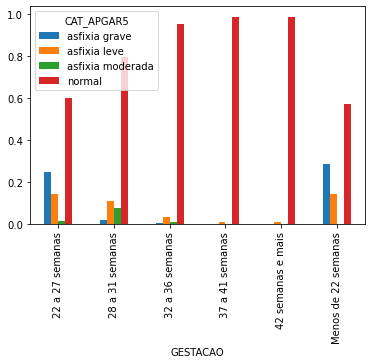

In [8]:
freq_pct.plot.bar()

O gráfico acima corrobora com a afirmação dos médicos uma vez que quanto menor é o tempo de gestação o número de nascimentos com asfixia aumenta e a partir das 37 semanas quase 99% dos nascimentos acontecem sem nenhum tipo asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

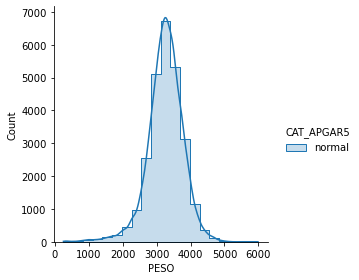

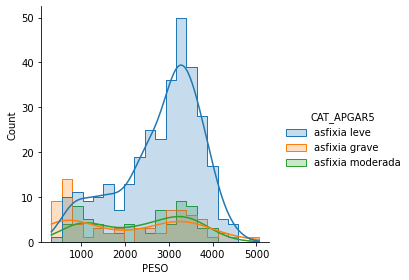

In [26]:
sns.displot(data = df.loc[(~df.CAT_APGAR5.isnull()) & (df['CAT_APGAR5'] == 'normal')] 
            ,alpha = .25
            ,x = 'PESO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
            ,hue = 'CAT_APGAR5'
            ,height = 4
           
           )


sns.displot(data = df.loc[(~df.CAT_APGAR5.isnull()) & (df['CAT_APGAR5'] != 'normal')] 
            ,alpha = .25
            ,x = 'PESO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
            ,hue = 'CAT_APGAR5'
            ,height = 4
           
           )



Vemos no histograma dos nascimentos sem asfixia (CAT_APGAR5 normal) que o peso segue uma distribuição normal, com a grande maioria dos nascimentos de crianças por volta dos 3 kg.  Já para as crianças que nasceram com algum tipo de asfixia, a dsitibuição normal não ocorre, pois vemos um segundo pico na curva de crianças que nasceram por volta de 1 kg ou menos.Quanto mais grave a asfixia mais este segundo pico "caminha" para a esquerda. Isto pode indicar que a variável APGAR5 tem relação com a variável PESO.